This notebook verifies that shallow copies of a parent element can share children, which is important to reduce copying and memory consumption.

In [1]:
import copy
import xml.etree.ElementTree as xml

import graphcat.notebook

In [2]:
def append_element(graph, name, inputs):
    parent = copy.copy(inputs.getone("parent"))
    child = inputs.getone("child")
    parent.append(child)
    return parent


def create_element(tag, attrib={}, **extra):
    def implementation(graph, name, inputs):
        return xml.Element(tag, attrib=attrib, **extra)
    return implementation

In [3]:
graph = graphcat.StaticGraph()
graph.add_task("canvas", create_element("canvas"))
graph.add_task("axes1", create_element("cartesian"))
graph.add_task("append1", append_element)
graph.add_links("canvas", ("append1", "parent"))
graph.add_links("axes1", ("append1", "child"))
graph.add_task("axes2", create_element("radial"))
graph.add_task("append2", append_element)
graph.add_links("append1", ("append2", "parent"))
graph.add_links("axes2", ("append2", "child"))

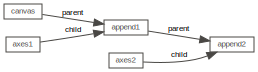

In [4]:
graphcat.notebook.display(graph)

In [5]:
xml.dump(graph.output("append2"))

<canvas><cartesian /><radial /></canvas>


In [6]:
# We're creating new parent elements, so the instances should be different.
assert(id(graph.output("append1")) != id(graph.output("canvas")))
assert(id(graph.output("append2")) != id(graph.output("append1")))

# Because the modified parents are shallow copies, the child instances should be the same.
assert(id(graph.output("append1")[0]) == id(graph.output("axes1")))
assert(id(graph.output("append2")[0]) == id(graph.output("axes1")))

assert(id(graph.output("append2")[1]) == id(graph.output("axes2")))